In [11]:
%pip install matplotlib
%pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


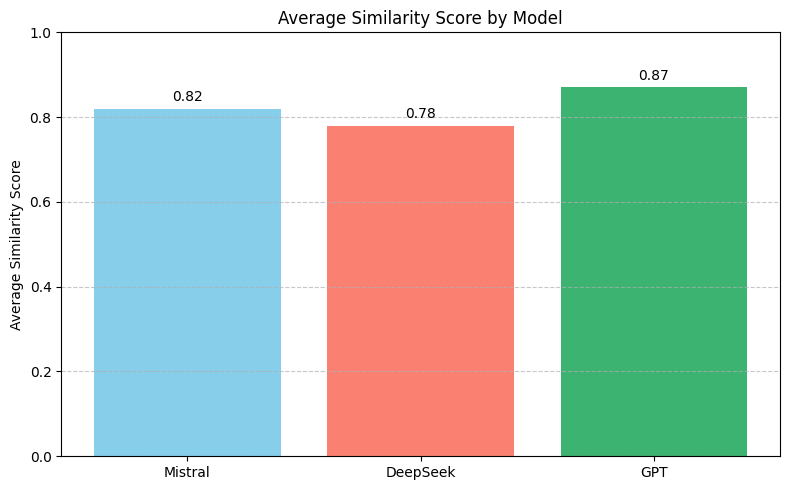

In [18]:
import matplotlib.pyplot as plt

# # Simulated average similarity scores for each model
# average_scores = {
#     "Mistral": 0.82,
#     "DeepSeek": 0.78,
#     "GPT": 0.87
# }

# # Extract names and scores
# models = list(average_scores.keys())
# scores = list(average_scores.values())

# # Plotting
# plt.figure(figsize=(8, 5))
# bars = plt.bar(models, scores, color=["skyblue", "salmon", "mediumseagreen"])
# plt.ylim(0, 1)
# plt.ylabel("Average Similarity Score")
# plt.title("Average Similarity Score by Model")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Annotate bars with scores
# for bar, score in zip(bars, scores):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
#              f"{score:.2f}", ha='center', va='bottom', fontsize=10)

# plt.tight_layout()
# plt.show()

In [6]:
%pip install sentence_transformers

  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl.metadata (25 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (31 kB)
  Using cached scipy-1.15.2-cp311-cp311-macosx_10_13_x86_64.whl.metadata (61 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_10_12_x86_64.whl.metadata (3.8 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
Using cached safetensors-0.5.3-cp38-abi3-macosx_10_12_x86_64.whl (436 kB)
Using cached torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl (150.8 MB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Us

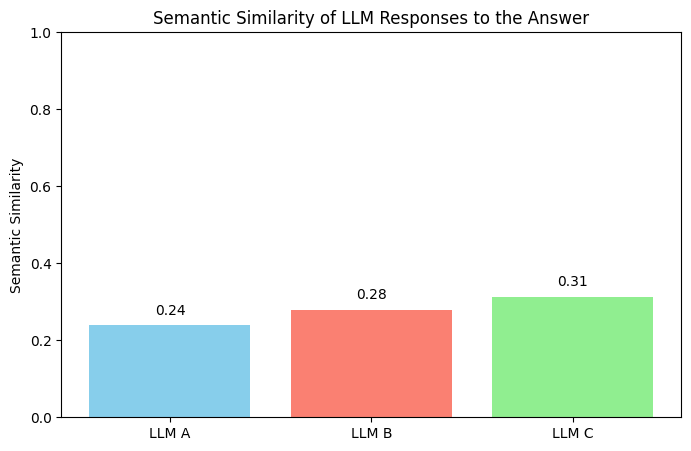

In [12]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the texts
answer = "a b c d e f g h i j k l m n o p q r s t u v w x y z"
llm_a = "ab "
llm_b = "c"
llm_c = "y"

# Encode the texts
embeddings = model.encode([answer, llm_a, llm_b, llm_c], convert_to_tensor=True)

# Compute cosine similarities
similarities = {
    "LLM A": util.cos_sim(embeddings[0], embeddings[1]).item(),
    "LLM B": util.cos_sim(embeddings[0], embeddings[2]).item(),
    "LLM C": util.cos_sim(embeddings[0], embeddings[3]).item()
}

# Plotting
labels = list(similarities.keys())
scores = list(similarities.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel("Semantic Similarity")
plt.title("Semantic Similarity of LLM Responses to the Answer")

# Show similarity score on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.show()


In [67]:


import aiohttp
import asyncio


async def fetch_api( age, gene_fault, llm, category, patient_question):
    async with aiohttp.ClientSession() as session:
        link = "http://127.0.0.1:8000/chat"
        payload = {
                "age" : age,
                "gene_fault": gene_fault,
                "llm": llm,
                "category": category,
                "patient_question": patient_question
            }
        resp = await session.post( link, json=payload  )
        
        try:
            data = await resp.json()
            print("Response JSON:", data)
            return data
        except aiohttp.ContentTypeError:
            text = await resp.text()
            print("Response Text:", text)
            return text
        


In [68]:

import json

data = await fetch_api( 50, "BRCA1", "mistral", "breast_cancer", "What is the best treatment for me?" )




Response JSON: {'output': 'Deciding how to best manage your cancer risk, especially at age 50 with a BRCA1 gene fault, involves considering several options:\n\n1. **Risk-Reducing Surgery**:\n   - **Bilateral Risk-Reducing Mastectomy (BRRM)**: This surgery involves the removal of both breasts and can decrease your chance of developing breast cancer by at least 90%. If you have not had BRRM by age 50, regular screening and early treatment can be as effective as BRRM at preventing breast cancer-related death. However, BRRM will decrease the chance that you will develop breast cancer and need to undergo treatment (such as chemotherapy) in the future. For more information on risk-reducing surgery, you can read "Reducing your breast cancer risk with surgery."\n   - **Risk-Reducing Medication**: You may also consider taking certain medications such as Tamoxifen after a discussion with your specialist. For more information, please read "Reducing your breast cancer risk with medication."\n\n2. 

/var/folders/1b/w_b85q5s52z0g49mft8vztxw0000gn/T/ipykernel_22398/3537418230.py:3: RuntimeWarning: coroutine 'ClientResponse.json' was never awaited
  data = await fetch_api( 50, "BRCA1", "mistral", "breast_cancer", "What is the best treatment for me?" )


In [1]:
# print  ( data["output"] )

In [52]:
import json
with open("response.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=2, ensure_ascii=False)

TypeError: Object of type ClientResponse is not JSON serializable